## Analogtivation

In [1]:
import keras
import matplotlib.pyplot as plt

import numpy as np
from time import gmtime, strftime
from math import tan, radians

Using TensorFlow backend.


### Building a clock

Current Time: 18:9:55


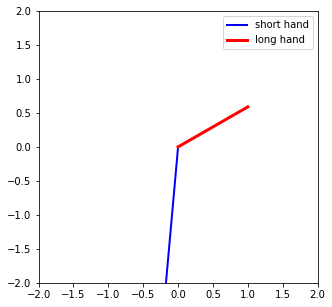

In [124]:
current_time = gmtime()
    
hour   = int(strftime("%H", current_time))
minute = int(strftime("%M", current_time))
second = int(strftime("%S", current_time))
    
# clock starts at 12 (90 degrees) and moves clock-wise
def to_clock_angle(theta):
    return -1 * (theta - 90)
    
exact_hour   = hour%12 + minute/60 + second/(60*60)
exact_minute = minute  + second/60
    
short_hand_angle = to_clock_angle(360 * exact_hour/12)
long_hand_angle  = to_clock_angle(360 * exact_minute/60)

# hand of clock is linear function where slope is equal to tan(angle)
def short_hand(x):
    return tan(radians(short_hand_angle)) * x
def long_hand(x):
    return tan(radians(long_hand_angle)) * x

# plot clock
x_neg = np.linspace(-1, 0, 2)
x_pos = np.linspace(0,  1, 2)

print("Current Time: {}:{}:{}".format(hour, minute, second))
plt.figure(figsize=(5, 5)) 
plt.plot(x_pos             * (exact_hour   < 6.0)  + x_neg             * (exact_hour   >= 6.0), 
         short_hand(x_pos) * (exact_hour   < 6.0)  + short_hand(x_neg) * (exact_hour   >= 6.0),  
         label = "short hand", linewidth = 2, color = "blue")
plt.plot(x_pos             * (exact_minute < 30.0) + x_neg             * (exact_minute >= 30.0), 
         long_hand(x_pos)  * (exact_minute < 30.0) + long_hand(x_neg)  * (exact_minute >= 30.0), 
         label = "long hand",  linewidth = 3, color = "red")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()

### The activation function

In [48]:
def my_activation(x):
    current_time = gmtime()
    
    hour   = int(strftime("%H", current_time))
    minute = int(strftime("%M", current_time))
    second = int(strftime("%S", current_time))
    
    short_hand_angle = (hour%12 + minute/60 + second/(60*60)) * 360/12
    long_hand_angle  = (minute  + second/60) * 360/60
    
    short_hand = tan(radians(to_clock_angle(short_hand_angle))) * x
    long_hand  = tan(radians(to_clock_angle(long_hand_angle)))  * x
    
    return np.piecewise(x, [x < 0, x >= 0], [short_hand, long_hand])

In [52]:
my_activation(my_activation(x))

ValueError: NumPy boolean array indexing assignment cannot assign 20 input values to the 10 output values where the mask is true

In [47]:
plt.plot(my_activation(x))
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 20 input values to the 10 output values where the mask is true

In [43]:
my_activation(np.linspace(-1,1,3))

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 1 output values where the mask is true

### Build network

In [31]:
# Load data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 28*28).astype('float32') / 255
X_test  = X_test.reshape(10000, 28*28).astype('float32') / 255

y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test  = keras.utils.np_utils.to_categorical(y_test, 10)

# Build model
model = keras.models.Sequential([
    keras.layers.Dense(32, input_shape=(784,), activation = my_activation),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam')

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

### Train model

In [10]:
hist = model.fit(X_train, y_train, 
          batch_size = 128, nb_epoch = 4, 
          verbose = 1, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.


C:\Users\rjohnson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 1s 14us/step - loss: 0.4090 - val_loss: 0.2381
Epoch 2/4
60000/60000 [==============================] - 1s 11us/step - loss: 0.2078 - val_loss: 0.1903
Epoch 3/4
60000/60000 [==============================] - 1s 11us/step - loss: 0.1662 - val_loss: 0.1575
Epoch 4/4
60000/60000 [==============================] - 1s 11us/step - loss: 0.1394 - val_loss: 0.1435
